In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install segmentation-models

In [ ]:
!pip install tf-semantic-segmentation

In [ ]:
import segmentation_models as sm
sm.set_framework('tf.keras')
sm.framework()

In [ ]:
import tf_semantic_segmentation
from tf_semantic_segmentation import models

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from google.colab import files
import os
import glob
import sklearn
import random
import sys
from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

In [ ]:
train_images = []
# SIZE_X = 640
# SIZE_Y = 480

img_names = glob.glob("/content/drive/MyDrive/inżynierka/dataset-inż/marked/dataset_marked_1/JPEGImages/*.png")
img_names.sort()
print(img_names)
mask_names = glob.glob("/content/drive/MyDrive/inżynierka/dataset-inż/marked/dataset_marked_1/SegmentationClass/*.png")
mask_names.sort()
print(mask_names)
for img in img_names:
      img = cv2.imread(img, cv2.IMREAD_COLOR)       
      # img = cv2.resize(img, (SIZE_X, SIZE_Y))
      img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
      train_images.append(img)
     
train_images = np.array(train_images)

train_masks = [] 
for mask in mask_names:
      mask = cv2.imread(mask, 0)       
      # mask = cv2.resize(mask, (SIZE_X, SIZE_Y))
      train_masks.append(mask)
        
train_masks = np.array(train_masks, dtype=np.bool)

In [ ]:
X = train_images
Y = train_masks
Y = np.expand_dims(Y, axis = 3)

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# x_train = (x_train.astype('float32')) / 255.0
# x_val = (x_val.astype('float32')) / 255.0

In [ ]:
image_x = random.randint(0, len(x_train)-1)
check_train = x_train[image_x]
check_mask = np.squeeze(y_train[image_x])
imshow(check_train)
print(np.shape(check_train))
print(check_train)
plt.show()
imshow(check_mask)
print(np.shape(check_mask))
print(check_mask)

In [ ]:
print("(num_images, height, width, num_channels)")
print(f"shape(x_train): {np.shape(x_train)}")
print(f"shape(y_train): {np.shape(y_train)}")
print(f"shape(x_val): {np.shape(x_val)}")
print(f"shape(y_val): {np.shape(y_val)}")

(num_images, height, width, num_channels)
shape(x_train): (235, 480, 640, 3)
shape(y_train): (235, 480, 640, 1)
shape(x_val): (59, 480, 640, 3)
shape(y_val): (59, 480, 640, 1)


In [ ]:
model_erfnet_ = models.erfnet(input_shape=(480, 640, 3), num_classes=1)
model_erfnet_.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

callbacks = [
             # tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=9),
             tf.keras.callbacks.TensorBoard(log_dir='logs_'),
             tf.keras.callbacks.ModelCheckpoint('erfnet_labbot.h5', verbose=1, save_best_only=True)
]

In [ ]:
model_erfnet_.summary()
# tf.keras.utils.plot_model(model_erfnet_, 'modelerfnet.png')

In [ ]:
history = model_erfnet_.fit(
    x_train, y_train,
    batch_size=10,
    epochs=70,
    verbose=1,
    # validation_split=0.1,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

In [ ]:
preds_train = model_erfnet_.predict(x_train, verbose=1)
preds_val = model_erfnet_.predict(x_val, verbose=1)


preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

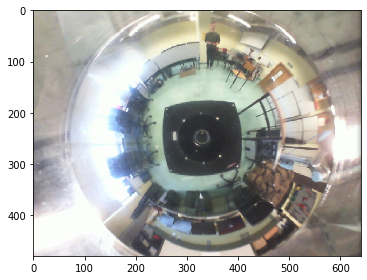

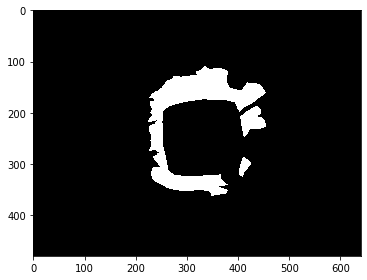

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


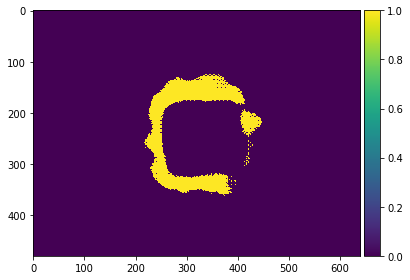

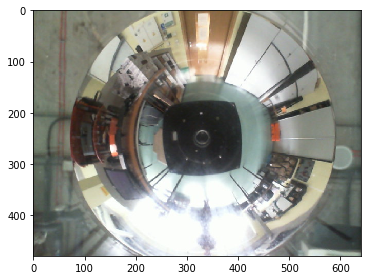

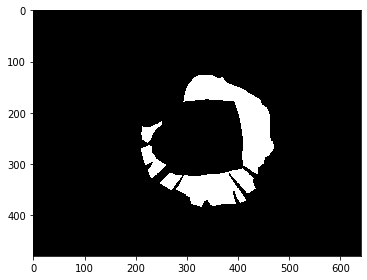

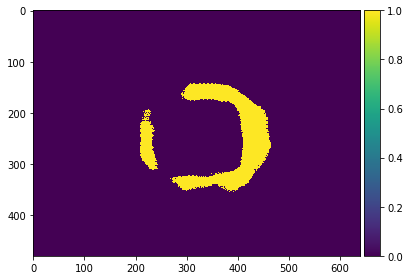

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# Perform a sanity check on some random training samples
ix = random.randint(0, len(preds_train_t))
img_3 = x_train[ix]
imshow(img_3)
plt.show()
img_2 = np.squeeze(y_train[ix])
imshow(img_2)
plt.show()
img_1 = np.squeeze(preds_train_t[ix])
imshow(img_1)
plt.show()

ix = random.randint(0, len(preds_val_t))
imshow(x_val[ix])
plt.show()
imshow(np.squeeze(y_val[ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.show()
print(img_1)

In [ ]:
model_erfnet_.save('erfnet_labbot_70.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


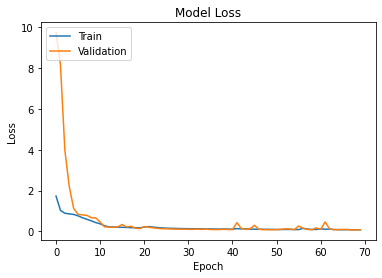

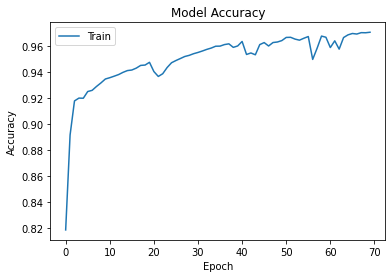

In [ ]:
          plt.plot(history.history['loss'])
          plt.plot(history.history['val_loss'])
          plt.title('Model Loss')
          plt.ylabel('Loss')
          plt.xlabel('Epoch')
          plt.legend(['Train', 'Validation'], loc='upper left')
          plt.show()
          plt.plot(history.history['accuracy'])
          #plt.plot(history.history['val_acc'])
          plt.title('Model Accuracy')
          plt.ylabel('Accuracy')
          plt.xlabel('Epoch')
          plt.legend(['Train', 'Validation'], loc='upper left')
          plt.show()